# Playstore Scraper

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all, reviews

In [37]:
# Define and configure Google Play Scraper library for Tiktok reviews
result, continuation_token = reviews(
    "com.ss.android.ugc.trill",
    lang="en", # Default language is 'en'.
    country="id", # Default country is 'us', set country to Indonesia.
    sort=Sort.NEWEST, # Default is Sort.MOST_RELEVANT.,
    count=100000
)

In [38]:
df_reviews = pd.DataFrame(np.array(result), columns=["review"])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop("review").tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,8fb7f3eb-f789-4c7f-8260-1eb466b608eb,Navin Navin,https://play-lh.googleusercontent.com/a/ALm5wu...,Not viral my vedios dont like tik tok,1,0,26.2.3,2022-09-28 06:17:50,None,NaT
1,75003d22-cd62-4468-92b5-268beb5944de,Kasyadie Bin Kasmilin,https://play-lh.googleusercontent.com/a-/ACNPE...,mantap,5,0,26.3.3,2022-09-28 06:09:50,None,NaT
2,4b71d014-8deb-4b8c-8132-d35491e44fb1,Han Roxas,https://play-lh.googleusercontent.com/a-/ACNPE...,The best,5,0,26.3.4,2022-09-28 06:08:12,None,NaT
3,e2020f1d-4165-4910-9af0-46c615885bf9,Ester Buangjog,https://play-lh.googleusercontent.com/a/ALm5wu...,Tik Tok,5,0,26.2.41,2022-09-28 05:58:05,None,NaT
4,2dc7b33b-0e6c-47e7-8b06-542d6229d236,colson's orange juice,https://play-lh.googleusercontent.com/a-/ACNPE...,Please fix this bug where my account randomly ...,3,0,None,2022-09-28 05:58:03,None,NaT


In [39]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              100000 non-null  object        
 1   userName              100000 non-null  object        
 2   userImage             100000 non-null  object        
 3   content               100000 non-null  object        
 4   score                 100000 non-null  int64         
 5   thumbsUpCount         100000 non-null  int64         
 6   reviewCreatedVersion  68003 non-null   object        
 7   at                    100000 non-null  datetime64[ns]
 8   replyContent          66 non-null      object        
 9   repliedAt             66 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 7.6+ MB


In [40]:
# Count number of review scores
df_reviews['score'].value_counts()

5    70747
1    13913
4     6796
3     5181
2     3363
Name: score, dtype: int64

<AxesSubplot: xlabel='score', ylabel='count'>

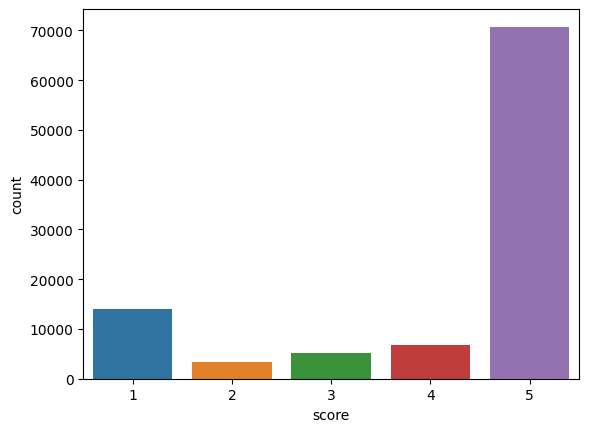

In [41]:
sns.countplot(data = df_reviews, x='score')

<AxesSubplot: ylabel='score'>

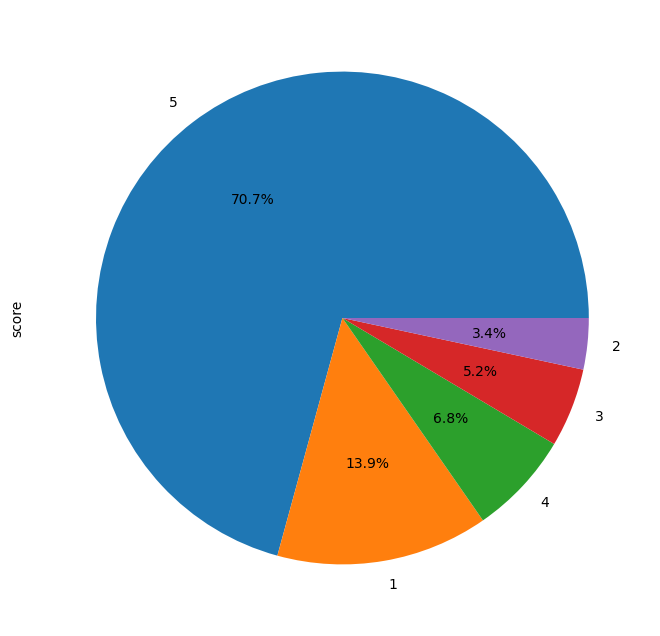

In [42]:
# Visualize review scores as pie chart
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [43]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])
# Display new dataframe header
df_reviews_content.head()

,content,score
0,Not viral my vedios dont like tik tok,1
1,mantap,5
2,The best,5
3,Tik Tok,5
4,Please fix this bug where my account randomly ...,3


In [46]:
# Save sample data to CSV file
df_reviews_content.to_csv("../data/tiktok_playstore_reviews_last_100000_20220929.csv")